In [94]:
import os
import sys
sys.path.append('../')
sys.path.append('../datasets')
sys.path.append('../models')
import torch
import torchvision
import torch.backends.cudnn as cudnn
import random
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from importlib import reload
from datasets.three_dim_shapes import ThreeDimShapesDataset
from datasets.small_norb import SmallNORBDataset
from datasets.seq_mnist import SequentialMNIST
from datasets.seq_mnist import SequentialMNIST_double
from datasets import seq_mnist as sm

import models.seqae as seqae
import models.base_networks as bn 
import models
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge
from einops import rearrange
from sklearn.metrics import r2_score
import pdb
from einops import rearrange
from utils import notebook_utils as nb
from utils import evaluations as ev



import copy

import csv
import ast
from source import yaml_utils as yu


from tqdm import tqdm

if torch.cuda.is_available():
    device = torch.device('cuda')
    cudnn.deterministic = True
    cudnn.benchmark = True
else:
    device = torch.device('cpu')
    gpu_index = -1

    
from utils import yaml_utils as yu
import yaml
rootpath = '/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/'
result_dir = '/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/result'
jobdir = '/mnt/vol21/masomatics/ULASclone/jobs'

mode = 'so3'
dat_root = f"""/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/datasets/{mode}"""

playground_path = os.path.join(result_dir, '20220913_playground_model')


print(os.path.exists(playground_path))

print(nb.filter_list('double', os.listdir(result_dir)))
targpath = os.path.join(result_dir, '20221103_mnist_double_0')
print(os.path.exists(targpath))

True
['20221031_double_mnist_two_0', '20221103_mnist_double_0', '20221101_mnist_double_0', '20221031_double_mnist_0', '20221101_mnist_double_two_0']
True


In [95]:

targlist = os.listdir(targpath)

targlist = nb.model_exists(targlist,  targpath)
print(targlist)

['dim_m512', 'dim_m256']


['dim_m512', 'dim_m256']
['dim_m512', 'dim_m256']


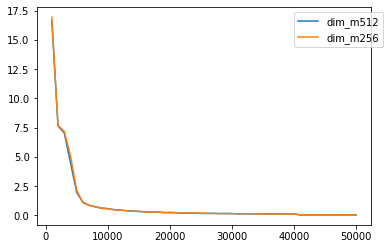

In [96]:
print(os.listdir(targpath))

resultlist = os.listdir(targpath)
print(resultlist)


for result in resultlist:
    studypath = os.path.join(targpath, result)
    history = nb.read_history(studypath)
    if len(history) > 0:
        plt.plot(history['iteration'], history['train/loss'], label = result)
        #print(history['train/loss'][-1])
plt.legend(bbox_to_anchor=(1.05, 1))
#plt.savefig(os.path.join(jobpath, f"""{targdir}_learning.png"""))

In [97]:
reload(ev)
results = {} 
inferred_Ms = {} 
model_configs = {}
models = {}
tp = 10
n_cond = 2
device =0
predictive = False
reconstructive = False
repeats=3


targdir_pathlist = [os.path.join(targpath, targdir) for targdir in targlist] 

#targdir_pathlist = []
#targdir_pathlist.append(playground_path)

print(targdir_pathlist)

reload(ev)
reload(bn)
allresults, targ, xnext = ev.prediction_evaluation([targdir_pathlist[1]], device=0,
                                                                        n_cond=2,
                                                                        tp=tp,
                                                                    repeats=1,
                           predictive= False , reconstructive = False)

results = allresults['results']



['/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/result/20221103_mnist_double_0/dim_m512', '/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/result/20221103_mnist_double_0/dim_m256']
{'args': {'T': 12, 'backgrnd': False, 'max_T': 12, 'max_angle_velocity_ratio': [-0.5, 0.5], 'max_color_velocity_ratio': [-0.5, 0.5], 'only_use_digit4': True, 'pair_transition': True, 'root': '/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/datasets/MNIST', 'train': True}, 'fn': './datasets/seq_mnist.py', 'name': 'SequentialMNIST_double'}
/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/result/20221103_mnist_double_0/dim_m256 
 snapshot_model_iter_50000


/usr/local/lib/python3.8/site-packages/torch/nn/modules/lazy.py:178: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '
100%|██████████| 183/183 [00:17<00:00, 10.32it/s]


tensor([0.0247, 0.0396, 0.0606, 0.0833, 0.1097, 0.1428, 0.1827, 0.2282, 0.2769,
        0.3332])


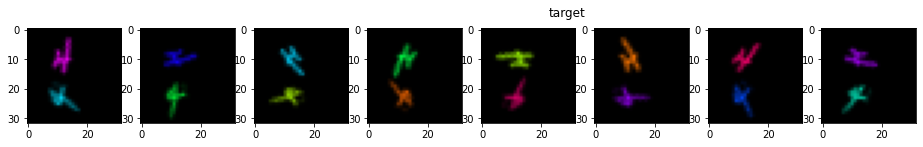

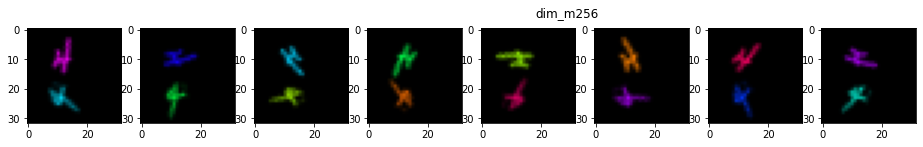

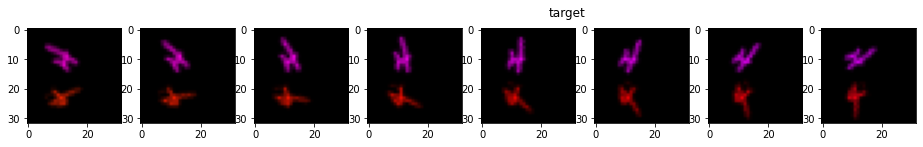

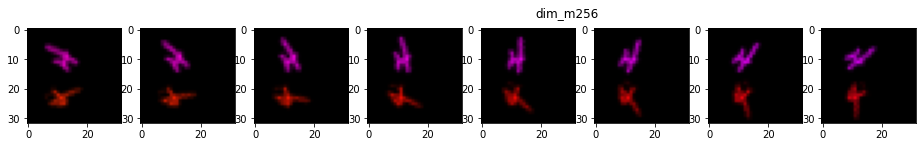

In [98]:
idx = 10
device = 0
reload(sm)
for idx in list(range(8, 10)):
    figsize = (20,2)


    plt.figure(figsize = figsize)
    for k in range(tp-n_cond):
        tn = torch.permute(targ[idx][k+n_cond], (1,2,0))
        plt.subplot(1, tp, k+1)
        plt.imshow(tn, interpolation=None)
    plt.suptitle("target")  

    for mode in list(allresults['models'].keys()):
        plt.figure(figsize = figsize)
        xnext, M = ev.predict(targ, allresults['models'][mode].to(device),
                    n_cond=2, tp=15, device=device, swap =False,
                    predictive=False, reconstructive=False)
        xnext = xnext.to('cpu')
        M = M.to('cpu')
        for k in range(tp-n_cond):
            xn = torch.permute(xnext[idx][k], (1,2,0))
            plt.subplot(1, tp, k+1)
            plt.imshow(xn, interpolation=None)
        plt.suptitle(mode.split('/')[-1])    


/tmp/ipykernel_10351/1081894385.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  plt.imshow(torch.tensor(datseq[k]).permute([1, 2, 0]))
/tmp/ipykernel_10351/1081894385.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  plt.imshow(torch.tensor(datseq_two[k]).permute([1, 2, 0]))


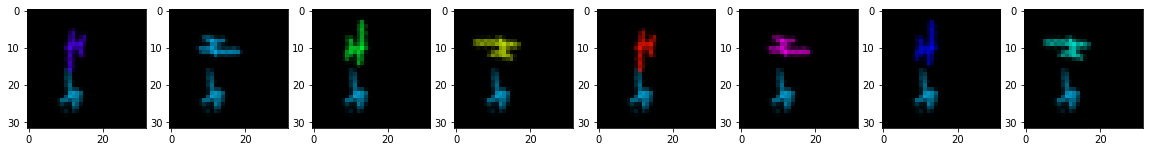

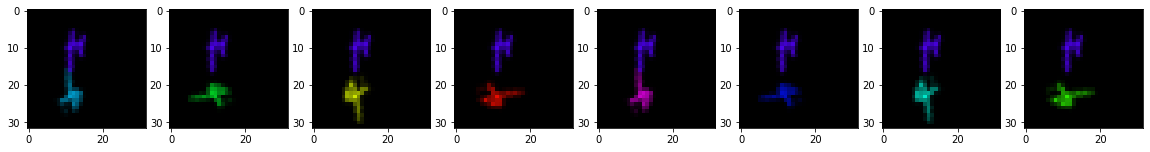

In [99]:
reload(sm)
checkmodelpath = '/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/result/20221103_mnist_double_0/dim_m256'
config = nb.load_config(checkmodelpath)
data_args = config['train_data']['args']
data_args['T'] = 8
check_idx = 18
seedval = 1

double_dat = sm.SequentialMNIST_double(**data_args)
plt.figure(figsize=(20, 20))
np.random.seed(seedval)
datseq = double_dat.one_obj_immobile(check_idx)
np.random.seed(seedval)
datseq_two = double_dat.one_obj_immobile(check_idx, mode=0)

datseq = [torch.tensor(datseq[k]) for k in range(len(datseq))]
for k in range(len(datseq)):
    plt.subplot(5, len(datseq),  k+1)
    plt.imshow(torch.tensor(datseq[k]).permute([1, 2, 0])) 
    
plt.figure(figsize=(20, 20))
datseq_two = [torch.tensor(datseq_two[k]) for k in range(len(datseq_two))]
for k in range(len(datseq_two)):
    plt.subplot(5, len(datseq_two),  k+1)
    plt.imshow(torch.tensor(datseq_two[k]).permute([1, 2, 0])) 

In [100]:
#checkmodelpath = '/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/result/20221101_mnist_double_0/dim_m312'
checkmodel = allresults['models'][checkmodelpath].to('cpu')

In [315]:
encoded = checkmodel.encode(torch.stack(datseq).unsqueeze(0))[0].detach()
encoded_two = checkmodel.encode(torch.stack(datseq_two).unsqueeze(0))[0].detach()

In [102]:
#raw modeling

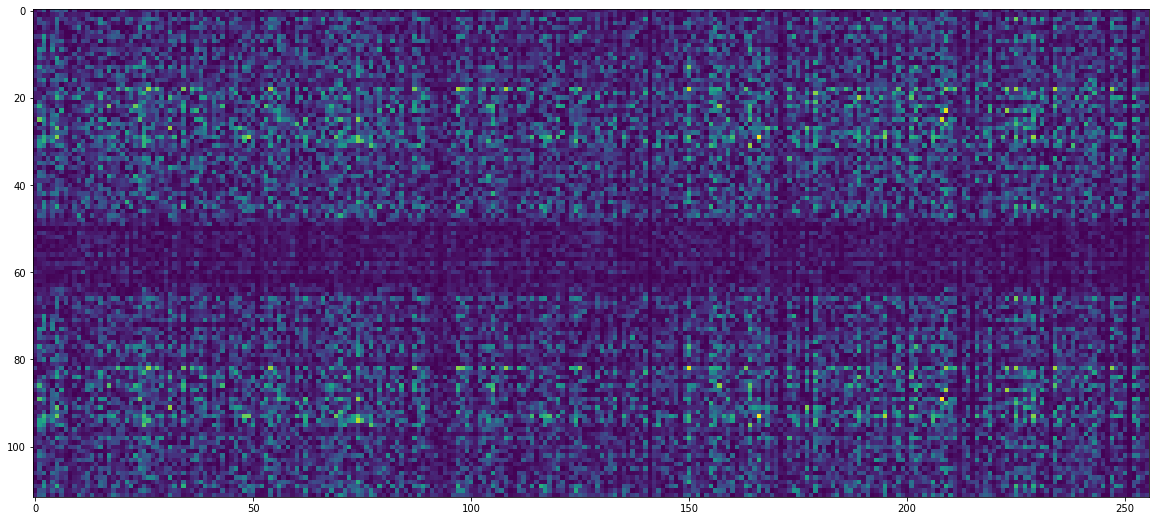

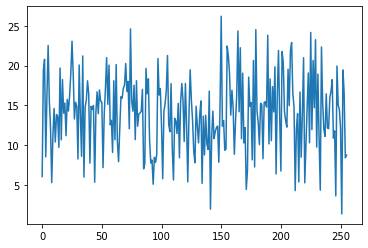

In [103]:
import einops
plt.figure(figsize=(20,10))
deltaraw = encoded[1:] - encoded[0]
deltaraw = einops.rearrange(deltaraw, 't s a -> (t a) s')
plt.imshow(torch.abs(deltaraw).detach())
# for k in range(1, len(datseq)):
#     plt.subplot(len(datseq), 1,  k+1)
#     z = encoded[k].permute([1,0])
#     plt.imshow(torch.abs(z-z0) )

unko = torch.sqrt(torch.sum(deltaraw ** 2, axis=0))
plt.figure()
plt.plot(unko)


In [104]:
import einops
print(encoded.shape)

torch.Size([8, 256, 16])


In [105]:
# unko= torch.tensor(np.random.normal(size=(312,312))).float()
# trial = torch.einsum('b s a, s t -> b t a', encoded, unko)
# torch.mean(torch.abs(trial[0, :, 4] -  encoded[0, : , 4] @ unko))
# trial.shape

In [106]:
from utils import optimize_lasso as ol 
reload(ol)
Ptrain = ol.ChangeOfBasisR(d = encoded.shape[1], reg=10.0)
Ptrain.train()
optimizer = torch.optim.Adam(Ptrain.parameters(), config['lr']/2)
num_iter = 30000
for k in range(num_iter):
    myloss, delta = Ptrain.grouplasso_loss(encoded[1:], encoded[0])
    optimizer.zero_grad()
    myloss.backward()
    optimizer.step()
    if k % 2000 == 0:
        print(f"""iter {k}: {myloss.item()}""")
    
  
    



iter 0: 8806.8525390625
iter 2000: 387.7435607910156
iter 4000: 300.879638671875
iter 6000: 258.96173095703125
iter 8000: 239.49542236328125
iter 10000: 229.15560913085938
iter 12000: 222.71188354492188
iter 14000: 218.21795654296875
iter 16000: 214.8252410888672
iter 18000: 212.17001342773438
iter 20000: 209.97573852539062
iter 22000: 208.16217041015625
iter 24000: 206.61798095703125
iter 26000: 205.26405334472656
iter 28000: 204.06979370117188


<Figure size 1440x720 with 0 Axes>

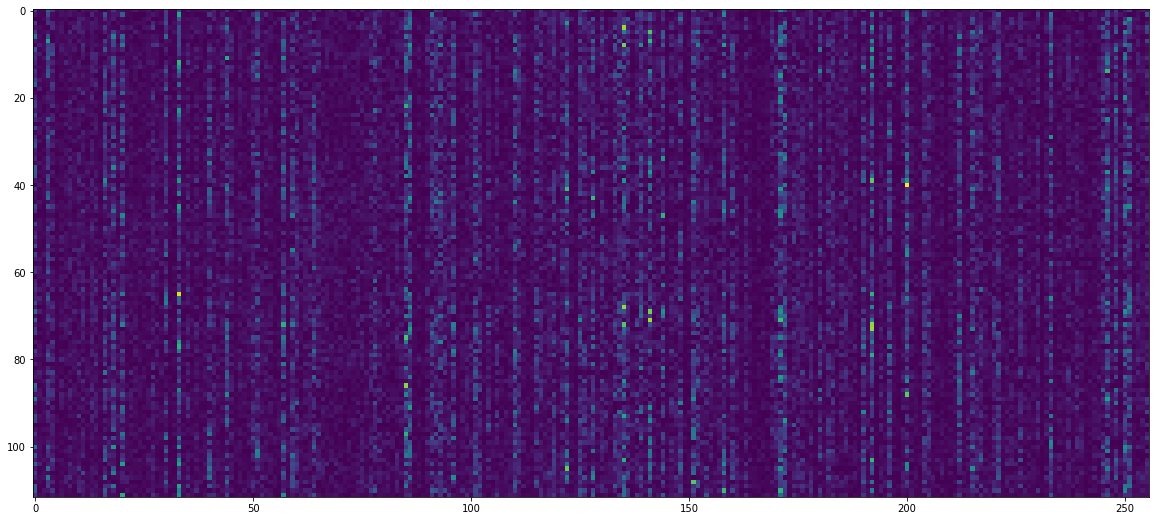

<Figure size 1440x720 with 0 Axes>

In [107]:
plt.figure(figsize=(20,10))
Ptrain = Ptrain.to(0)
encoded = encoded.to(0)
Pz = Ptrain(encoded).detach()
deltaP = Pz[1:] - Pz[0]
deltaP = einops.rearrange(deltaP, 't s a -> (t a) s').to('cpu') 
plt.imshow(torch.abs(deltaP))

plt.figure(figsize=(20,10))


#plt.imshow(torch.abs(delta))
# for k in range(1, len(datseq)):
#     plt.subplot(len(datseq), 1,  k+1)
    
#     plt.imshow(torch.abs(delta[k]).permute([1,0]))
#     plt.title(f"""t = {k}  """)

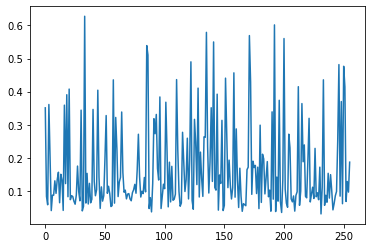

In [108]:
unko = torch.sqrt(torch.sum(deltaP ** 2, axis=0))

plt.plot(unko)

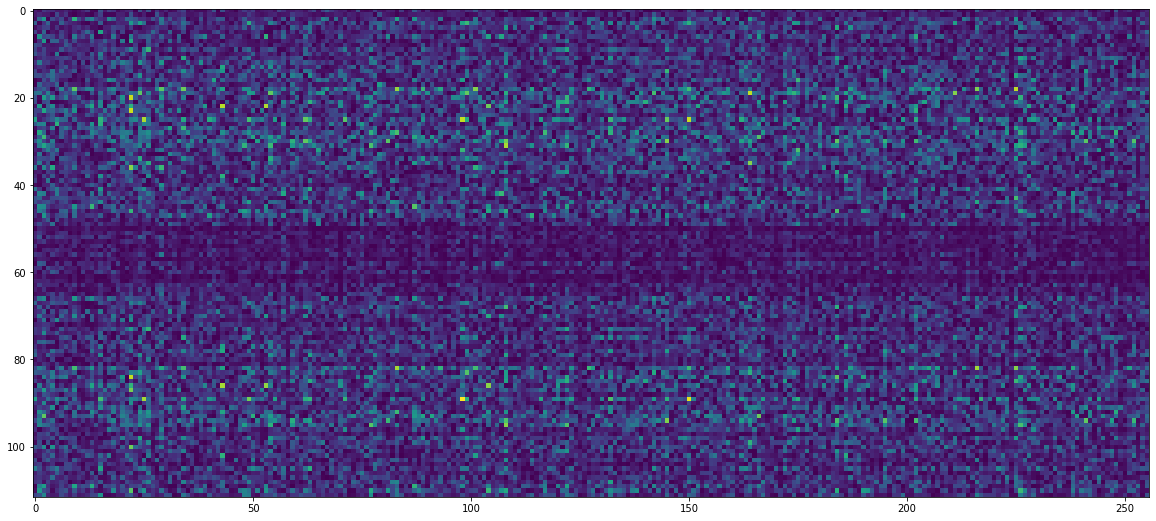

In [109]:
plt.figure(figsize=(20,10))
Ptrain = Ptrain.to(0)
encoded_two = encoded_two.to(0)
Pz_two = Ptrain(encoded_two).detach().to('cpu')
delta_two = Pz_two[1:] - Pz_two[0]
delta_two = einops.rearrange(delta_two, 't s a -> (t a) s')
plt.imshow(torch.abs(delta_two))
# for k in range(1, len(datseq)):
#     plt.subplot(len(datseq), 1,  k+1)
    
#     plt.imshow(torch.abs(delta_two[k]).permute([1,0]))
#     plt.title(f"""t = {k}  """)

In [186]:
from utils import optimize_bd_cob as obc 

Ms = allresults['Ms'][checkmodelpath]
ChangeB= obc.optimize_bd_cob(Ms,  lr=0.1, epochs_monitor=10, n_epochs=100) 

ep:9 loss:7.906727181114346
ep:19 loss:7.888614705473297
ep:29 loss:7.885433629619386
ep:39 loss:7.878152788195533
ep:49 loss:7.874857554326356
ep:59 loss:7.871750254044994
ep:69 loss:7.870906214728742
ep:79 loss:7.866151485652068
ep:89 loss:7.865975171154144
ep:99 loss:7.8655316399532165


In [187]:
PMPs = ChangeB(Ms)

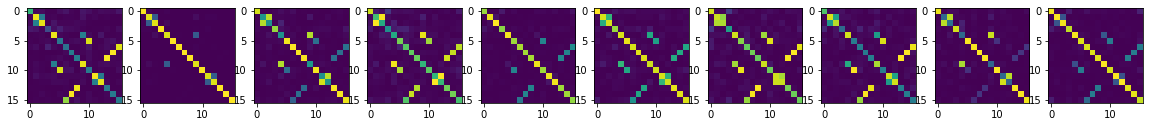

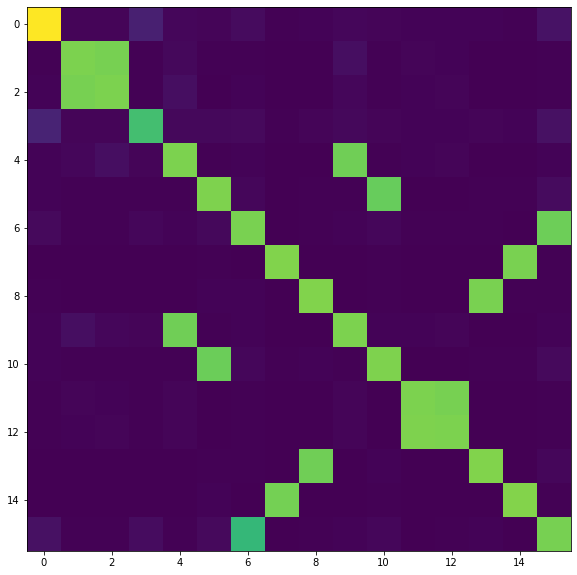

In [189]:
plt.figure(figsize=(20, 20))
for k in range(10):
    plt.subplot(1, 10, k+1)
    plt.imshow(torch.abs(PMPs[k]).detach().to('cpu'))
    
plt.figure(figsize=(10, 10))
plt.imshow(torch.mean(torch.abs(PMPs.detach()), axis=0))


In [287]:
reload(obc)
selections = obc.obtain_blocks(trial)
print(selections)
selection = selections[3]
print(selection)




[[0], [1, 2], [3], [4, 9], [5, 10], [6, 15], [7, 14], [8, 13], [11, 12]]
[4, 9]
torch.Size([8, 256, 2])


torch.Size([8, 256, 2])
torch.Size([8, 256, 2])
torch.Size([8, 256, 2])
torch.Size([8, 256, 2])
torch.Size([8, 256, 2])
torch.Size([8, 256, 2])
torch.Size([8, 256, 2])


<Figure size 1440x720 with 0 Axes>

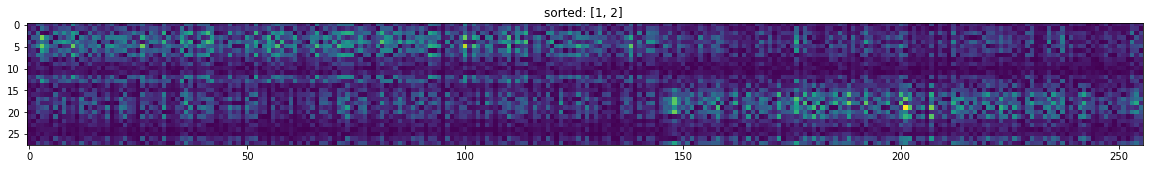

<Figure size 1440x720 with 0 Axes>

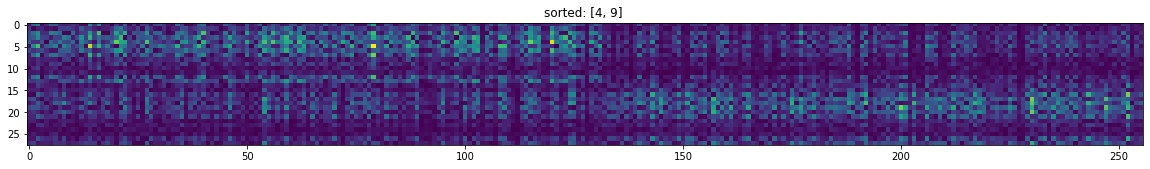

<Figure size 1440x720 with 0 Axes>

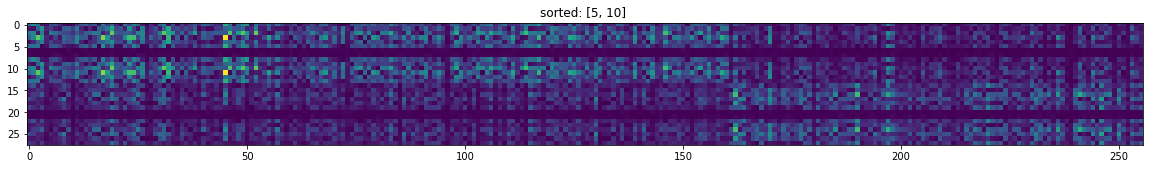

<Figure size 1440x720 with 0 Axes>

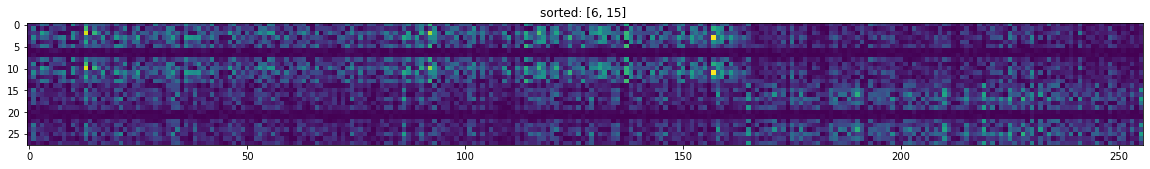

<Figure size 1440x720 with 0 Axes>

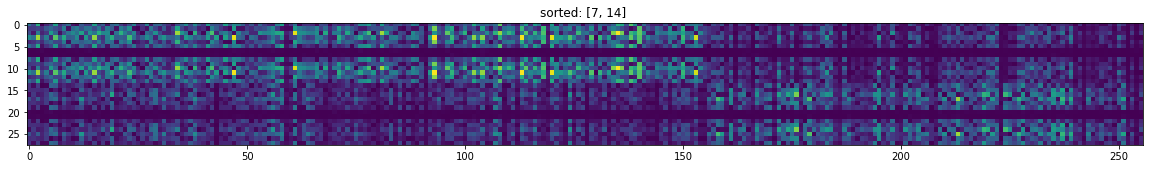

<Figure size 1440x720 with 0 Axes>

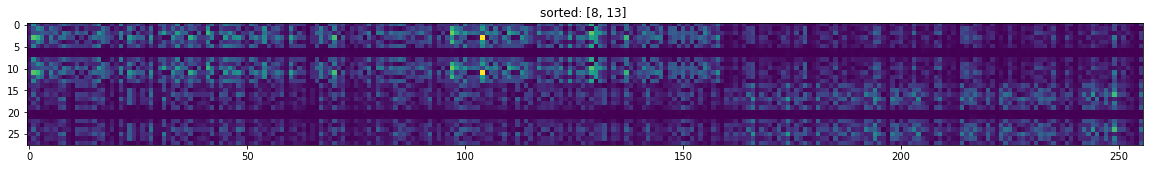

<Figure size 1440x720 with 0 Axes>

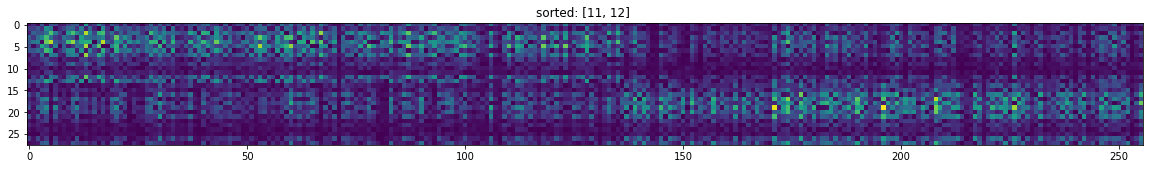

In [291]:
onewins = []
twowins = [] 

for selection in selections:
    if len(selection)> 1: 
        encodedU = (encoded.to('cpu') @ ChangeB.U).detach()[:, :, selection] 
        encoded_twoU = (encoded_two.to('cpu') @ ChangeB.U).detach()[:, :, selection] 
        print(encodedU.shape)

        plt.figure(figsize=(20,10))
        deltaU = encodedU[1:] - encodedU[0]
        deltaU = einops.rearrange(deltaU, 't s a -> (t a) s')
        delta_twoU = encoded_twoU[1:] - encoded_twoU[0]
        delta_twoU = einops.rearrange(delta_twoU, 't s a -> (t a) s')

        #plt.imshow(torch.abs(deltaU.detach().to('cpu')))

#         plt.imshow(torch.cat([torch.abs(deltaU.detach().to('cpu')),  torch.abs(delta_twoU.detach().to('cpu'))]  ))
#         plt.title(f"""raw : {selection} """)


        plt.figure(figsize=(20,10))

        deltaUsort, delta_twoUsort, (onewin, twowin) = sort_pair_col(deltaU, delta_twoU)

        plt.imshow(torch.cat([torch.abs(deltaUsort.detach().to('cpu')),  torch.abs(delta_twoUsort.detach().to('cpu'))]  ))
        plt.title(f"""sorted: {selection} """)




#plt.imshow(torch.cat([normalize_row(torch.abs(deltaU.detach().to('cpu'))),  normalize_row(torch.abs(delta_twoU.detach().to('cpu')))]  ))

In [185]:
device = 'cpu'

reload(ol)
Ptrain = ol.ChangeOfBasisR(d = encodedU.shape[1], reg=10.0).to(device)
encodedU = encodedU.to(device)
Ptrain.train()
optimizer = torch.optim.Adam(Ptrain.parameters(), config['lr'])
num_iter = 30000
for k in range(num_iter):
    myloss, deltaUP = Ptrain.grouplasso_loss(encodedU[1:], encodedU[0])
    optimizer.zero_grad()
    myloss.backward()
    optimizer.step()
    if k % 2000 == 0:
        print(f"""iter {k}: {myloss.item()}""")

iter 0: 24190.8359375
iter 2000: 650.3863525390625
iter 4000: 379.1969909667969
iter 6000: 276.40277099609375
iter 8000: 228.30581665039062
iter 10000: 203.388427734375
iter 12000: 188.71995544433594
iter 14000: 178.59024047851562
iter 16000: 171.34835815429688
iter 18000: 166.36705017089844
iter 20000: 162.7295684814453
iter 22000: 159.93771362304688
iter 24000: 157.72296142578125
iter 26000: 155.88548278808594
iter 28000: 154.40232849121094


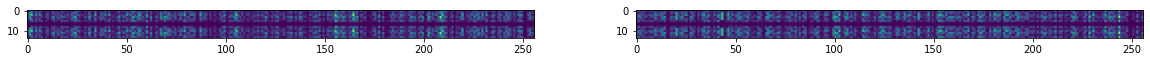

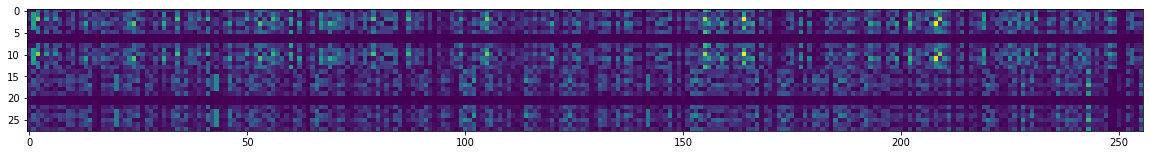

In [166]:
# Before Lasso

zU = encodedU.detach().to('cpu')
zU_two = encoded_twoU.detach().to('cpu')


deltaU = (zU[1:] - zU[0]).detach()
delta_twoU = (zU_two[1:] - zU_two[0]).detach()


deltaU = einops.rearrange(deltaU, 't s a -> (t a) s')
delta_twoU = einops.rearrange(delta_twoU, 't s a -> (t a) s')


plt.figure(figsize=(20,10))
plt.subplot(1, 2 , 1)
plt.imshow(torch.abs(deltaU))

plt.subplot(1, 2 , 2)
plt.imshow(torch.abs(delta_twoU))

plt.figure(figsize=(20,10))
plt.imshow(torch.cat([torch.abs(deltaU), torch.abs(delta_twoU)]))



plt.figure(figsize=(20,10))
plt.imshow(torch.cat([torch.abs(deltaU), torch.abs(delta_twoU)]))



torch.Size([14, 1])
torch.Size([14, 1])


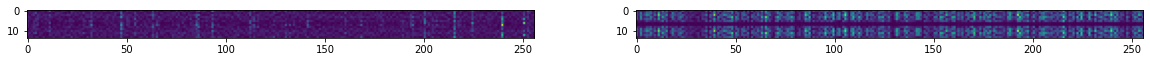

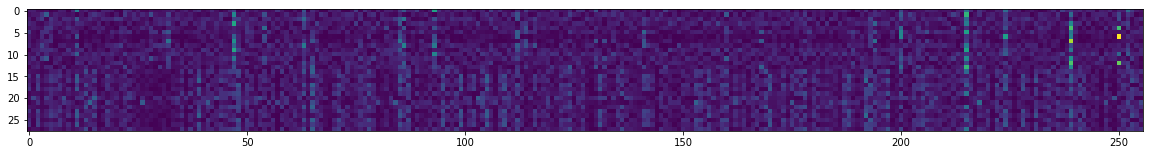

In [178]:
# After Lasso

Ptrain = Ptrain.to('cpu')
PzU = Ptrain(encodedU.to('cpu')).detach()
PzU_two = Ptrain(encoded_twoU.to('cpu')).detach()


PdeltaU = PzU[1:] - PzU[0]
Pdelta_twoU = PzU_two[1:] - PzU_two[0]


PdeltaU = einops.rearrange(PdeltaU, 't s a -> (t a) s')
Pdelta_twoU = einops.rearrange(Pdelta_twoU, 't s a -> (t a) s')


plt.figure(figsize=(20,20))

plt.subplot(1, 2 , 1)
plt.imshow(torch.abs(PdeltaU))



plt.subplot(1, 2 , 2)
plt.imshow(torch.abs(Pdelta_twoU))


plt.figure(figsize=(20,10))
plt.imshow(torch.cat([normalize_row(torch.abs(PdeltaU)), normalize_row(torch.abs(Pdelta_twoU))]))



In [176]:
def normalize_col(tensor):
    colnorm = torch.sqrt(torch.sum(tensor**2, axis=0, keepdim=True))
    tensor = tensor/colnorm
    return tensor
    
def normalize_row(tensor):
    rownorm = torch.sqrt(torch.sum(tensor**2, axis=1, keepdim=True))
    print(rownorm.shape)
    tensor = tensor/rownorm
    return tensor

torch.Size([14, 1])


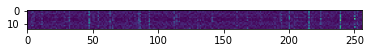

In [177]:
plt.imshow(normalize_row(torch.abs(PdeltaU)))

In [175]:
torch.abs(PdeltaU).shape

torch.Size([14, 256])

In [220]:
def sort_pair_col(tensor1, tensor2):
    one_wins = []
    two_wins = []
    for j in range(tensor1.shape[-1]):
        if torch.sum(tensor1[:,j]**2) > torch.sum(tensor2[:, j]**2):
            one_wins.append(j)
        else:
            two_wins.append(j)
    wholelist = one_wins + two_wins
    return tensor1[:, wholelist], tensor2[:, wholelist]
        

In [219]:
deltaU[0].shape

torch.Size([256])

In [252]:
alldims = list(range(PMPs.shape[1]))


idx = 2
trial = torch.mean(torch.abs(PMPs), axis=0)
deviate = trial[idx] - torch.mean(trial[idx])
thresh = torch.std(deviate)
np.where(deviate > thresh)[0]

array([1, 2])

In [244]:
deviate

tensor([ 0.7184, -0.0519, -0.0529,  0.0044, -0.0501, -0.0526, -0.0421, -0.0593,
        -0.0575, -0.0490, -0.0526, -0.0571, -0.0558, -0.0574, -0.0595, -0.0249],
       grad_fn=<SubBackward0>)

In [260]:
unko =list(range(PMPs.shape[1]))
aaa = [1,2]

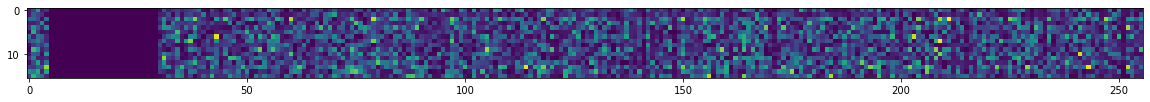

In [318]:
reload(ol)
transformed = ol.apply_to_select_col(torch.zeros([16, 16]), encoded.to('cpu')[0], list(range(5, 30)))
plt.figure(figsize=(20,10))
plt.imshow(torch.abs(transformed).permute([1,0]))

In [332]:
PMPk = PMPs[k].detach().to('cpu')
blockid = 3
PMPk[:, selections[blockid]][selections[blockid], :]

tensor([[ 0.9648,  0.2703],
        [-0.2400,  0.9721]])

[0]